In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import scipy.io as sio
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel as C
import matplotlib.pyplot as plt
from core.vhgpr import VHGPR

Load Data

In [3]:
Data = sio.loadmat('motorcycle.mat')
DX = Data['X']
DY = Data['y'].flatten()

In [4]:
kernelf = C(10.0, (1e-1, 3*1e3)) * RBF(5, (1e-1, 1e2)) 
kernelg = C(10.0, (1e-1, 1e2)) * RBF(5, (1e-1, 1e2))

In [5]:
vhgpr = VHGPR(kernelf, kernelg, 5)
vhgpr.fit(DX, DY)

../../core/vhgpr.py:209: RuntimeWarning: overflow encountered in exp
  R = np.exp(mu-np.diag(Sigma)/2)


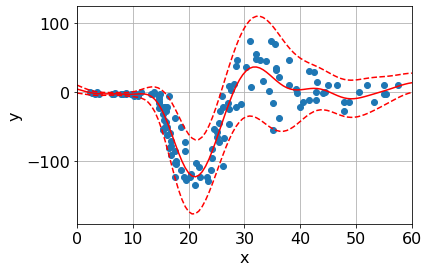

In [6]:
x = np.atleast_2d(np.linspace(0,60,100)).T
mean, _, log_var, _ = vhgpr.predict(x)

plt.figure()          
plt.plot(DX,DY,"o")
plt.plot(x, mean,'r')
plt.plot(x, mean + 2 * np.sqrt(np.exp(log_var)), 'r--')
plt.plot(x, mean - 2 * np.sqrt(np.exp(log_var)),'r--')
plt.xlim(0,60)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()